# Jake's Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.graphics import regressionplots
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from statsmodels.tools.eval_measures import rmse

sns.set(font_scale = 1)

In [3]:
df = pd.read_csv('data/churn.csv')

In [5]:
df.drop(['phone number', 'area code'], axis=1, inplace=True)

In [6]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

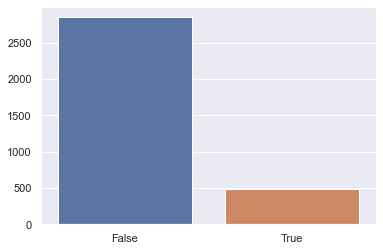

In [7]:
y = df["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [12]:
y_True = df["churn"][df["churn"] == True]
y_True = df["churn"][df["churn"] == True]
print ("Churn Level = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Level = 14.491449144914492


<AxesSubplot:xlabel='state'>

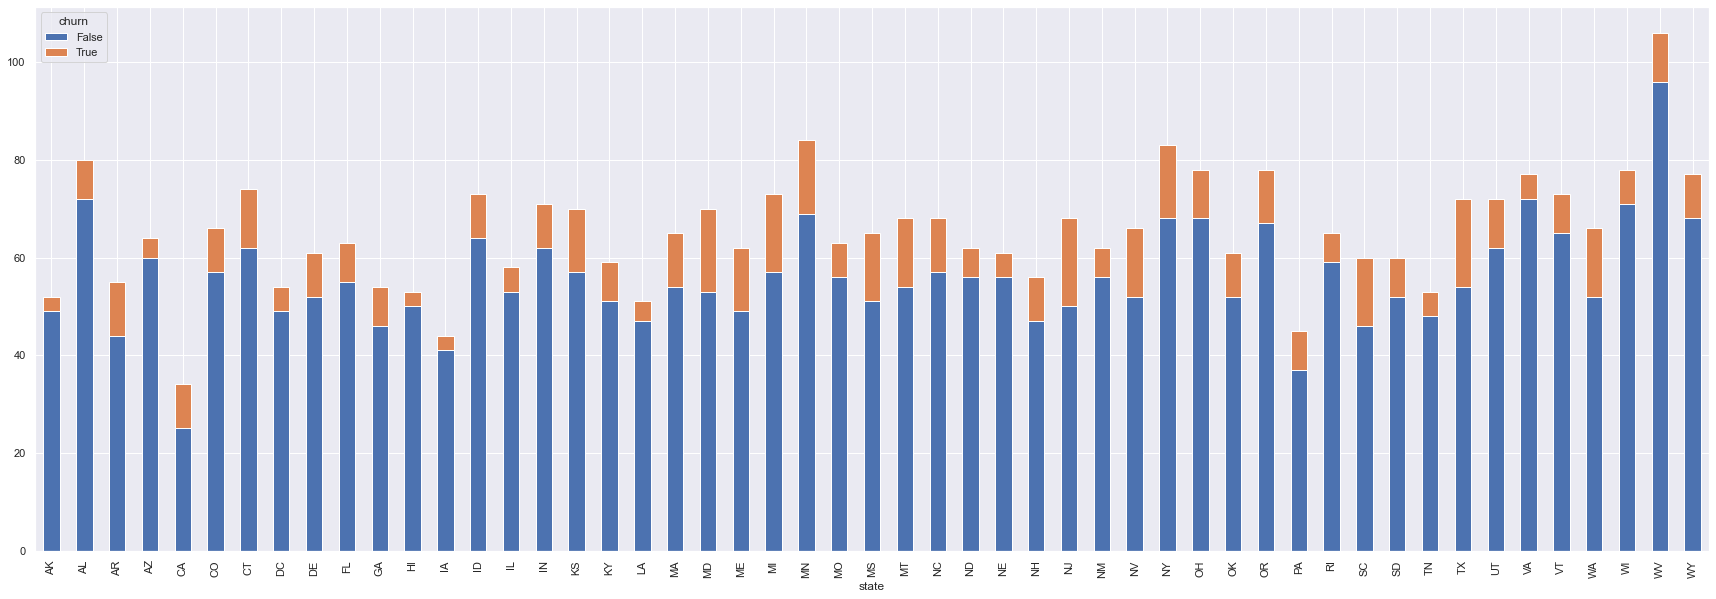

In [18]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

In [23]:
csc_calls = df.groupby('customer service calls').sum()
csc_calls.reset_index(drop=False, inplace=True)

In [24]:
csc_calls

,customer service calls,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,0,70608,5676,126739.3,70327,21546.13,140107.7,69770,11909.35,140946.9,69354,6342.71,7239.9,3098,1955.11,92
1,1,120202,9960,211936.3,119343,36029.75,239056.2,118254,20319.96,236393.6,118679,10637.73,11986.1,5365,3236.91,122
2,2,75312,6293,134156.1,75342,22807.02,152042.4,76194,12923.80,152518.0,76987,6863.37,7800.5,3397,2106.54,87
3,3,43515,2928,78642.8,42864,13369.41,84952.2,42390,7221.03,86780.0,42472,3905.12,4348.8,1932,1174.33,44
4,4,17042,1245,30589.2,16895,5200.25,33543.7,16948,2851.21,33050.7,16130,1487.31,1697.0,714,458.31,76
5,5,6769,479,11573.7,6568,1967.59,13073.9,6697,1111.31,12668.3,6450,570.13,698.7,292,188.67,40
6,6,1984,284,3322.2,2142,564.78,4335.6,2027,368.54,4448.1,2191,200.17,221.1,73,59.71,14
7,7,1045,69,1404.1,793,238.70,1967.8,969,167.26,1818.5,994,81.83,88.2,42,23.81,5
8,8,167,40,360.6,241,61.30,401.8,215,34.15,390.0,198,17.55,16.3,12,4.40,1
9,9,205,20,466.1,237,79.24,386.2,217,32.83,492.4,204,22.15,24.3,5,6.56,2
